<a href="https://www.kaggle.com/code/shadwaalaaeldin/data-analysis-visualization-of-nyc-airbnbs-2019?scriptVersionId=137550968" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1.Introduction

### About the dataset

- This dataset contains information about the listings of Airbnb in New York City of the year 2019.
- The data contains 48895 rows and 16 columns. 
- The data contains information about the id, host name, host_id, host_name, neighbourhood_group, neighbouhood, latitude, longitude, room type, price, minimum number of nights, number of reviews, last review, reviews per month, calculated host listings count, and availability during the year. 

### About this notebook

- This notebook involves data cleaning, exploratory data analysis
- To gain insights about the Airbnbs in New York City, and their pricing based on their location/type.  
- The code utilizes popular data analysis libraries such as Pandas, and Plotly

## 2. Data Loading & Overview

### Importing the libraries 

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pylab as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the data

In [2]:
airbnb_NY = pd.read_csv(r"/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
airbnb_NY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Overview

In [3]:
airbnb_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<span style="color:DarkRed;font-size: 18px;" >We can see from this info the following issues:</span>
<span style="color:DarkRed;font-size: 14px;" > 
    <br/>- The "last_review" and "reviews_per_month" have many empty cells
    <br/>- The dtype of last_review isnot a datetime type</span>

In [4]:
airbnb_NY.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<span style="color:DarkRed;font-size: 18px;" >To be exact, we ran .isnull().sum() to check how much is missing, and it is 10000 empty cells, almost 20% missing values. This raises a flag that we have to deal with it later in the data cleaning </span>

In [5]:
airbnb_NY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<span style="color:DarkRed;font-size: 18px;" >From the statistic description, we can spot the following issues: </span>
<span style="color:DarkRed;font-size: 14px;" > <br/>- There are listings with 0 price
<br/>- The max. price is 10000 which is so far away from the mean and 75% quartile, we got to check this outlier later
<br/>- Max of minimum nights is 1250
<br/>- Max of calculated host listings count is far away from the mean and 75% quartile, we got to check this outlier later. 
<br/>- Min. of availability is 0</span>

## 3. Data Cleaning 

### Renaming Columns

In [6]:
#Renaming the "neighbourhood_group" column to "Borough"
airbnb_NY.rename(columns = {'neighbourhood_group':'borough', "neighbourhood":"district", "price":"price ($)"}, inplace = True)
airbnb_NY.head()

,id,name,host_id,host_name,borough,district,latitude,longitude,room_type,price ($),minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dealing with missing values

In [7]:
airbnb_NY.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
borough                               0
district                              0
latitude                              0
longitude                             0
room_type                             0
price ($)                             0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#prints out columns with missing values with its %
for col in airbnb_NY.columns:
    pct = airbnb_NY[col].isna().mean() * 100
    if pct != 0:
        print("{} => {}%".format(col, round(pct, 2)))

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


<Axes: >

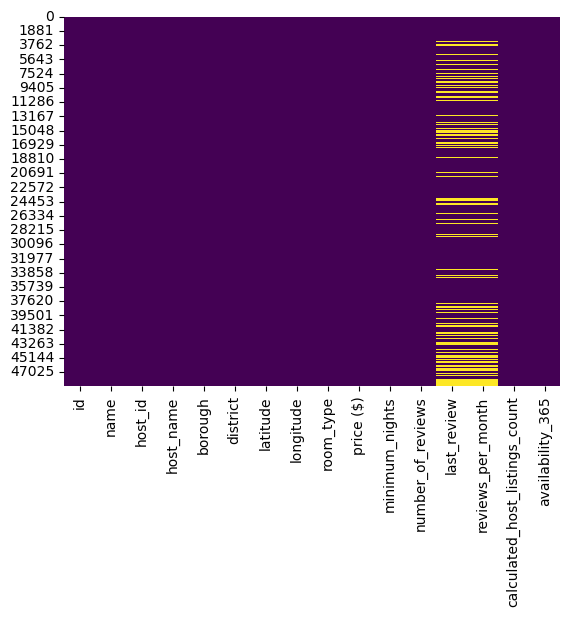

In [9]:
#heatmap of the missing values vs index
sns.heatmap(airbnb_NY.isnull(), cmap='viridis', cbar=False)

In [10]:
#dropping not important columns: host name for privacy, and row id not important
cols_to_drop = ["id", "host_name"]

airbnb_NY.drop(cols_to_drop, axis=1, inplace=True)

airbnb_NY

,name,host_id,borough,district,latitude,longitude,room_type,price ($),minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [11]:
airbnb_NY.isnull().sum()

name                                 16
host_id                               0
borough                               0
district                              0
latitude                              0
longitude                             0
room_type                             0
price ($)                             0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#replacing NaN in name and reviews per month with 0
airbnb_NY.fillna({"reviews_per_month":0, "name":0, "last_review":0}, inplace=True)
airbnb_NY.isnull().sum()

name                              0
host_id                           0
borough                           0
district                          0
latitude                          0
longitude                         0
room_type                         0
price ($)                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<span style="color:DarkRed;font-size: 18px;" >Note: fixed the missing values by dropping not important columns (host name, and id), and replaced NaN with 0 in other columns (name, last review, reviews per month</span>


### Dealing with incosistent data

In [13]:
#checking if there is any incosistancy in the neighbourhood names
airbnb_NY['borough'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: borough, dtype: int64

In [14]:
#checking if there is any incosistancy in the room types
airbnb_NY['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [15]:
#changing last review from object to datetime
airbnb_NY["last_review"] = pd.to_datetime(airbnb_NY["last_review"], errors='coerce', dayfirst=True)
airbnb_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   host_id                         48895 non-null  int64         
 2   borough                         48895 non-null  object        
 3   district                        48895 non-null  object        
 4   latitude                        48895 non-null  float64       
 5   longitude                       48895 non-null  float64       
 6   room_type                       48895 non-null  object        
 7   price ($)                       48895 non-null  int64         
 8   minimum_nights                  48895 non-null  int64         
 9   number_of_reviews               48895 non-null  int64         
 10  last_review                     48895 non-null  datetime64[ns]
 11  re

In [16]:
#checking for duplicates
airbnb_NY.duplicated().any()

False

### Dealing with outliers

In [17]:
airbnb_NY.describe()

,host_id,latitude,longitude,price ($),minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
#dropping all rows wtih minimum nights more than 365
indices_to_drop = airbnb_NY[airbnb_NY['minimum_nights'] > 365].index
airbnb_NY = airbnb_NY.drop(index=indices_to_drop)
airbnb_NY.shape

(48881, 14)

In [19]:
dropped = 48895-48881 
dropped

14

<span style="color:DarkRed;font-size: 18px;" >Note: 14 rows were dropped from the dataset as the min nights had more than 365 </span>

In [20]:
#dropping all rows wtih price equal to 0
price_rows_to_drop = airbnb_NY[airbnb_NY['price ($)'] == 0].index
airbnb_NY = airbnb_NY.drop(index=price_rows_to_drop)
airbnb_NY.shape

(48870, 14)

<span style="color:DarkRed;font-size: 18px;" >Note: Other 11 rows were dropped from the dataset as they had more than 365 </span>

In [21]:
availability_rows_to_drop = airbnb_NY[airbnb_NY['availability_365'] < 1].index
airbnb_NY = airbnb_NY.drop(index=availability_rows_to_drop)
airbnb_NY.shape

(31340, 14)

In [22]:
dropped = 48870-31340
dropped

17530

<span style="color:DarkRed;font-size: 18px;" >Note: Other 17530 rows were dropped from the dataset as there were not available any day during the year </span>

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


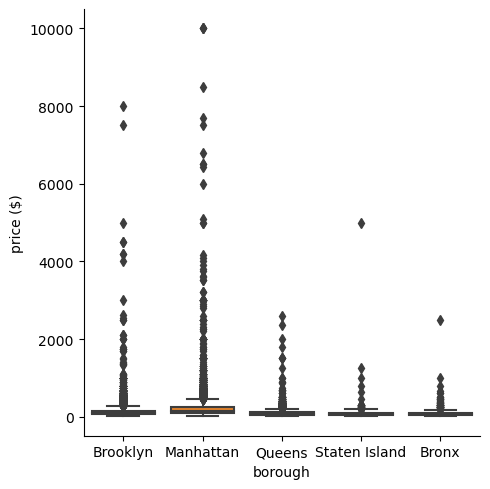

In [23]:
#trying to understand the price and its outliers
sns.catplot(data=airbnb_NY, x="borough", y="price ($)", kind="box")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


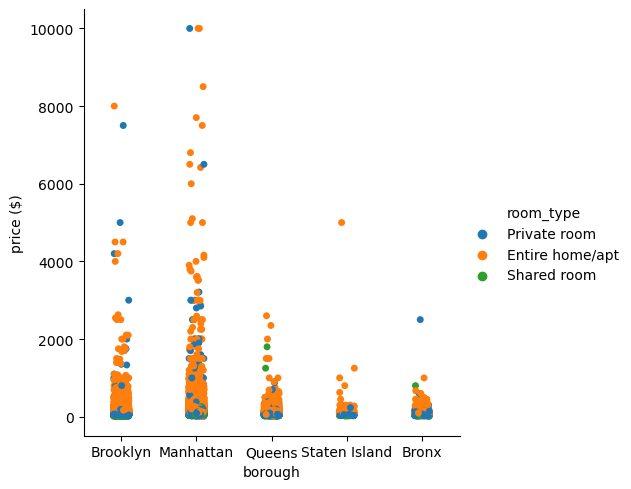

In [24]:
sns.catplot(data=airbnb_NY, x="borough", y="price ($)", hue="room_type")

<span style="color:DarkRed;font-size: 18px;" >Note: it seems there are prices that are extreme outliers, but it seems it is true prices </span>

## 4. Data visualizations 

### What is the distribution of Airbnbs among the 5 boroughs of NYC?

In [25]:
count_airbnbs = airbnb_NY['borough'].value_counts()
count_airbnbs = count_airbnbs.reset_index()

In [26]:
count_airbnbs

,index,borough
0,Manhattan,13553
1,Brooklyn,12247
2,Queens,4296
3,Bronx,913
4,Staten Island,331


In [27]:
fig = px.bar(count_airbnbs, 
              x="index",
             y="borough",
              template="none",
              color="index",
              height=400, width=800, 
              color_continuous_scale="Blugrn", 
              labels={"count":"Count of Airbnbs", "borough":"Boroughs of NYC"},
              title="Number of Airbnbs Listings in each borough in NYC")
            
fig.update_layout(yaxis_range=[0, 15000])
fig.show()

<span style="color:DarkRed;font-size: 18px;" >The Airbnbs are mostly found in Manhattan and Brooklyn </span>

### What is the distribution of Airbnbs among the 5 boroughs of NYC by room type?

In [28]:
fig = px.bar(airbnb_NY, 
              x="borough",
              template="none",
              color="room_type",
              barmode="group",
              height=400, width=800, 
              color_discrete_map={"Entire home/apt":"#11a579", "Private room": "#7f3c8d",  "Shared room": "#3969ac"},
              category_orders={"room_type":["Entire home/apt", "Private room", "Shared room"],
                             "borough":["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]},
              labels={"count":"Count of Airbnbs", "borough":"Boroughs of NYC", "room_type":"Room Type"},
              title="Number of Airbnbs by room type in each borough in NYC")
            
fig.show()

<span style="color:DarkRed;font-size: 18px;" >The most type of Airbnb in NYC is Entire homes/apts followed by private room. Shared rooms are very few in the 5 boroughs </span>

### What is the average price per night of Airbnbs by Borough and Room Type in NYC

In [29]:
mean_values = airbnb_NY.groupby(["borough", "room_type"])["price ($)"].mean()
mean_values = mean_values.reset_index()

In [30]:
mean_values["price ($)"] = round(mean_values["price ($)"], 2)
mean_values

,borough,room_type,price ($)
0,Bronx,Entire home/apt,131.68
1,Bronx,Private room,66.82
2,Bronx,Shared room,61.20
3,Brooklyn,Entire home/apt,187.76
4,Brooklyn,Private room,80.77
5,Brooklyn,Shared room,47.27
6,Manhattan,Entire home/apt,268.26
7,Manhattan,Private room,127.97
8,Manhattan,Shared room,84.44
9,Queens,Entire home/apt,155.33


In [31]:
fig = px.bar(mean_values, 
              x="borough",
              y="price ($)",
              template="none",
              color="room_type",
              barmode="group",
              height=400, width=800, 
              color_discrete_map={"Entire home/apt":"#11a579", "Private room": "#7f3c8d",  "Shared room": "#3969ac"},
              category_orders={"room_type":["Entire home/apt", "Private room", "Shared room"],
                             "borough":["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]},
              labels={"count":"Count of Airbnbs", "borough":"Boroughs of NYC", "room_type":"Room Type"},
              title="Average price per night of Airbnbs by room type in each borough in NYC")
            
fig.show()

<span style="color:DarkRed;font-size: 18px;" >The most expensive Airbnbs in NYC are found in Manhattan regardless of the room type </span>

### Distribution of price per night of Airbnbs by Borough and Room Type

In [32]:
fig = px.box(airbnb_NY, 
              x="borough",
              y="price ($)",
              template="none",
              color="room_type",
              height=800, width=800, 
              color_discrete_map={"Entire home/apt":"#11a579", "Private room": "#7f3c8d",  "Shared room": "#3969ac"},
              category_orders={"room_type":["Entire home/apt", "Private room", "Shared room"],
                             "borough":["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]},
              labels={"price ($)":"Price ($)", "borough":"Boroughs of NYC", "room_type":"Room Type"},
              title="Distribution of price per night of Airbnbs by Borough and Room Type",
            )

fig.show()

### The relationship between reviews per month and the price

In [33]:
fig = px.scatter(airbnb_NY, y="price ($)", 
                 x="reviews_per_month", 
                 template="none", 
                 height=800, width=800,
                 opacity=0.8,
                 color="borough",
                 color_discrete_sequence=px.colors.qualitative.Bold,
                 category_orders={"borough":["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]},
                 labels={"price ($)":"Price per night ($)", "reviews_per_month":"Reviews per month"},
                title="The relationship between reviews per month and the price"
                )
fig.show()

<span style="color:DarkRed;font-size: 18px;" >There is an exponential relationship between the price and reviews per month, the lower prices tend to receive more reviews </span>